# Análisis de EDA

**SÁNCHEZ**, FEDERICO JOSÉ; **PAPAGNA MALDONADO**, VICTORIA; **RODRÍGUEZ CUELLO**, JERÓNIMO; **PARRA**, MARCOS; **PARGA**, BORJA

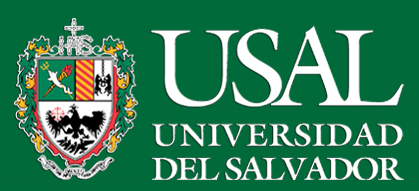

## **Cuestiones metodológicas**

Dos aspectos se tienen que tener en cuenta a la hora del análisis de actividad electrodérmica.

1. **Tiempos** y **componentes** de SCR
2. **Variabilidad intersujeto**

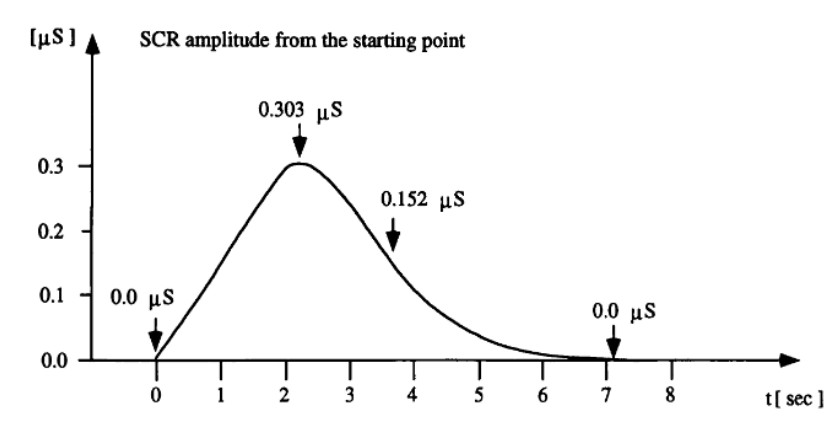

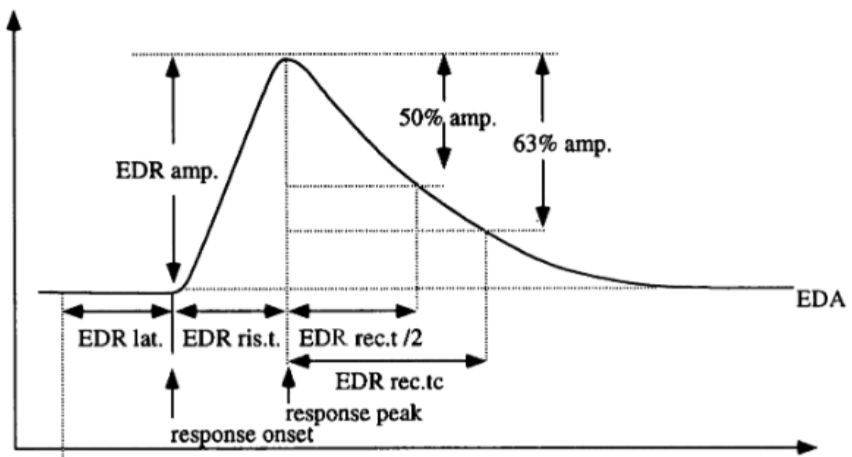

Boucsein, W. (2012). Methods of Electrodermal Recording. In: Electrodermal Activity. Springer, Boston, MA. https://doi.org/10.1007/978-1-4614-1126-0_2

[Paper](https://sci-hub.se/https://doi.org/10.1016/j.biopsycho.2008.10.007) que analiza la relación entre amplitud de SCR y intervalo entre estímulos (ISI)

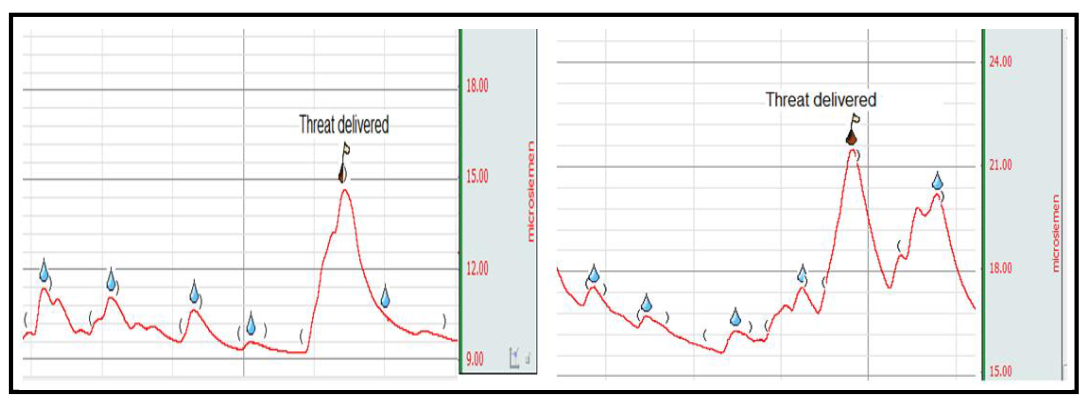

Braithwaite, J. J., & Watson, D. G. (2015). Issues surrounding the normalization and standardisation of skin conductance responses (SCRs). Univ. Birmingham, Birmingham, UK, Tech. Rep.

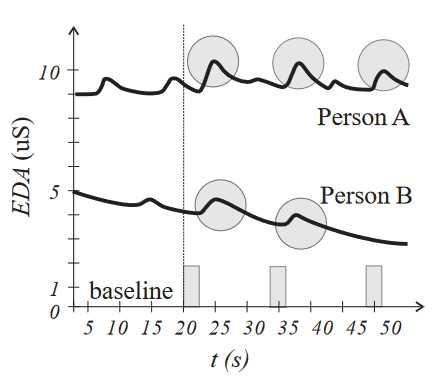

Geršak, G. (2020). Electrodermal activity-a beginner’s guide. Electrotechnical Review/Elektrotehniski Vestnik, 87(4).

## **Empezamos con el análisis**

0. Instalamos la librería [**Neurokit**](https://neuropsychology.github.io/NeuroKit/index.html)


In [ ]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 10.7 MB/s eta 0:00:00


1. Importamos las librerías necesarias

In [ ]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Leemos los datos

In [ ]:
# Escribí el nombre del archivo entre las comillas
archivo = "PRUEBA JERO 1.csv"

data = pd.read_csv(archivo, skiprows=7, names=["Time","uS"], skipfooter=3)

print(data)

          Time      uS
0    '-0:0:0.0  2.0131
1     '0:0:0.1  2.0136
2     '0:0:0.2  2.0138
3     '0:0:0.3  2.0130
4     '0:0:0.4  2.0130
..         ...     ...
780  '0:1:18.0  2.3699
781  '0:1:18.1  2.3747
782  '0:1:18.2  2.3834
783  '0:1:18.3  2.4015
784  '0:1:18.4  2.4185

[785 rows x 2 columns]


<ipython-input-4-c1257f7ddab3>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(archivo, skiprows=7, names=["Time","uS"], skipfooter=3)


3. Seleccionamos la señal cruda

In [ ]:
eda_cruda = data["uS"]

print(eda_cruda)

0      2.0131
1      2.0136
2      2.0138
3      2.0130
4      2.0130
        ...  
780    2.3699
781    2.3747
782    2.3834
783    2.4015
784    2.4185
Name: uS, Length: 785, dtype: float64


4. Veamosla!

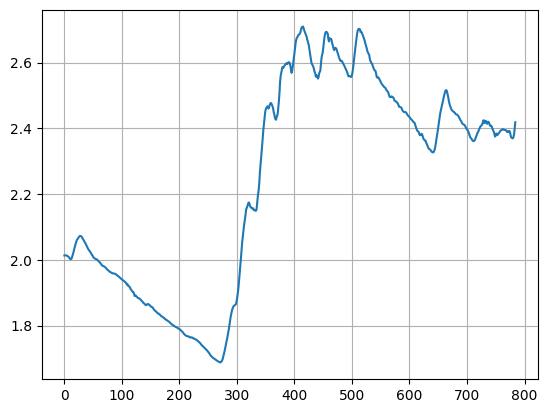

In [ ]:
plt.figure()
plt.plot(eda_cruda)
plt.grid(True)

plt.show()


¿Qué se puede ver?¿Qué es el eje y?¿Y el x?

5. Procesamos la señal

The raw signal, sampled at 10 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667


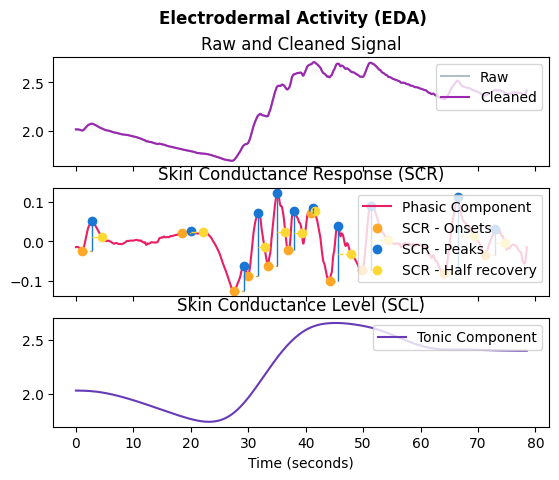

In [ ]:
signals, info = nk.eda_process(data["uS"],
                               sampling_rate=10,
                               report="text")

nk.eda_plot(signals, info)

In [ ]:
print("Estas son las variables en 'signals'")
print(signals.columns)

Estas son las variables en 'signals'
Index(['EDA_Raw', 'EDA_Clean', 'EDA_Tonic', 'EDA_Phasic', 'SCR_Onsets',
       'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime',
       'SCR_Recovery', 'SCR_RecoveryTime'],
      dtype='object')


In [ ]:
print("Estas son las variables en 'info'")
print(info.keys())

Estas son las variables en 'info'
dict_keys(['SCR_Onsets', 'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Recovery', 'SCR_RecoveryTime', 'sampling_rate'])


6. Graficamos la señal limpia, tónica y fásica

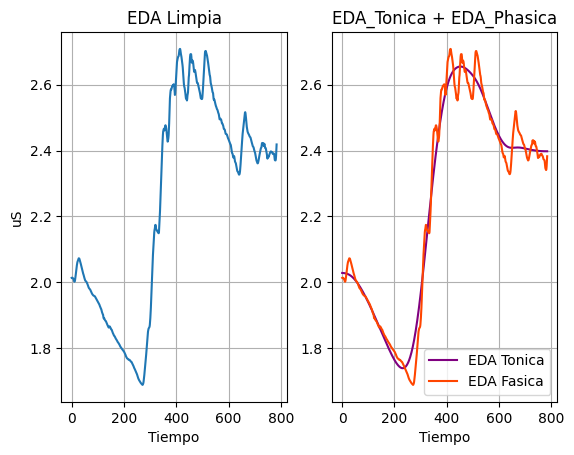

In [ ]:
eda_limpia = signals["EDA_Clean"]
eda_tonica = signals["EDA_Tonic"]
eda_fasica = signals["EDA_Phasic"]

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(eda_limpia)
plt.title('EDA Limpia')
plt.xlabel('Tiempo')
plt.ylabel('uS')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eda_tonica,label="EDA Tonica",color="purple")
plt.plot(eda_tonica+eda_fasica,label="EDA Fasica",color="orangered")
plt.title('EDA_Tonica + EDA_Phasica')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)

plt.show()

7. Usemos la función analyze de neurokit

In [ ]:
analisis = nk.eda_analyze(signals, sampling_rate=10,
                          method="interval-related")

print(analisis)

   SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  EDA_Sympathetic  \
0         11.0                  0.105612      0.313047         0.006708   

   EDA_SympatheticN  EDA_Autocorrelation  
0          0.002572             0.892309  


¿Qué significa cada variable?

8. Profundizando en EDA_Sympathetic

{'EDA_Sympathetic': 0.006708476797644479,
 'EDA_SympatheticN': 0.002572258695219324}

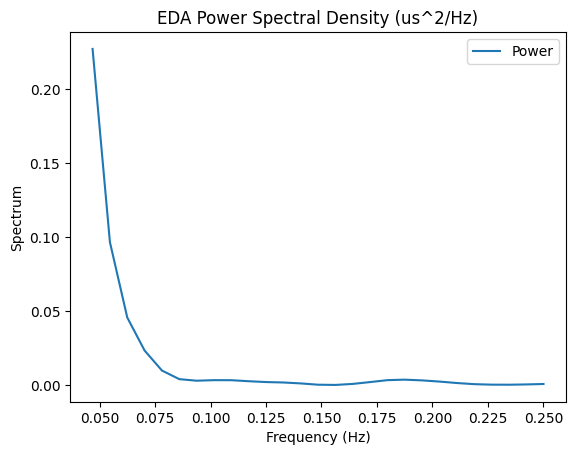

In [ ]:
nk.eda_sympathetic(eda_limpia, sampling_rate=10,
                   frequency_band=[0.045,0.25],
                   method='posada',
                   show=True)

¿Qué se puede interpretar de este gráfico?

{'EDA_Sympathetic': 0.08008011083719382,
 'EDA_SympatheticN': 0.0307054444143604}

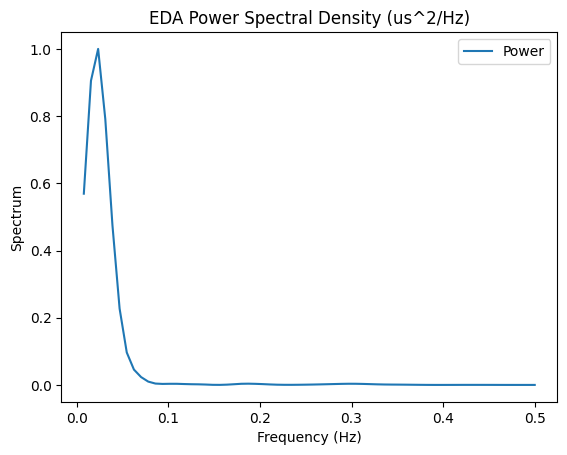

In [ ]:
nk.eda_sympathetic(eda_limpia, sampling_rate=10, frequency_band=[0.001, 0.5], method='posada', show=True)

Paper de [Posada-Quintero et al. (2016)](https://www.researchgate.net/profile/Hugo-Posada-Quintero/publication/300081316_Power_Spectral_Density_Analysis_of_Electrodermal_Activity_for_Sympathetic_Function_Assessment/links/5af1a1d3a6fdcc24364b6eb3/Power-Spectral-Density-Analysis-of-Electrodermal-Activity-for-Sympathetic-Function-Assessment.pdf) donde usan análisis de frecuencia en data de EDA

9. Profundicemos en autocorrelación

In [ ]:
nk.eda_autocor(eda_limpia, sampling_rate=10,
               lag=4)

0.8923089047497692

In [ ]:
sampling_rate = 10
n_samples = len(eda_limpia)
n_segundos = (n_samples // sampling_rate)

autocorrelaciones = []

for n in range(0, n_segundos):
    autocorr = nk.eda_autocor(eda_limpia, sampling_rate=sampling_rate, lag=n)
    autocorrelaciones.append(autocorr)

print(autocorrelaciones)

[1.0, 0.9821045229409755, 0.9545667097848899, 0.9277757015260987, 0.8923089047497692, 0.849026493383854, 0.8019416030714909, 0.7467538102955064, 0.6860218869373118, 0.6274528942975733, 0.5693679656818926, 0.506868727560379, 0.44262905220455323, 0.3820808919431119, 0.3247287955989316, 0.2688157221165556, 0.21325046223735725, 0.15664433264359853, 0.10135654318641701, 0.051552036943942135, 0.005102496297155719, -0.0418491612473741, -0.08766657775126618, -0.12955280873257047, -0.1662947703651117, -0.19844127643213205, -0.22834890252977774, -0.25594900276390503, -0.2814655819545695, -0.30213028289581806, -0.31766171793381764, -0.3286915657388885, -0.3371957896166106, -0.3457344586140897, -0.35137272803405567, -0.35161435793565526, -0.351754295777442, -0.3542000362866328, -0.35551660049796485, -0.3551853561444577, -0.3532531002322829, -0.3464961149432165, -0.3363609013056159, -0.3287844479574488, -0.3237474251081845, -0.3158692104137119, -0.3037606685151344, -0.29167189298760204, -0.27822303

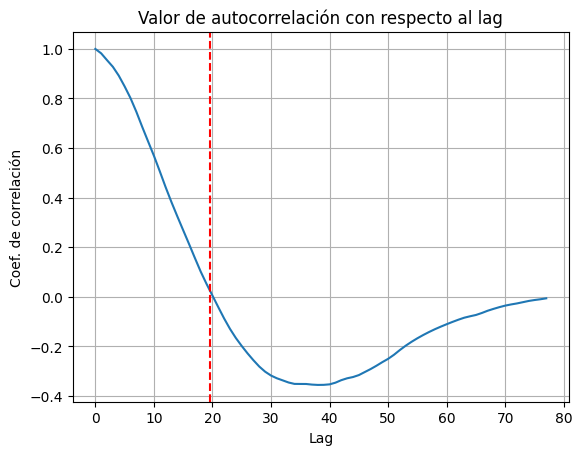

In [ ]:
plt.figure()
plt.plot(autocorrelaciones)
plt.xlabel("Lag")
plt.ylabel("Coef. de correlación")
plt.title("Valor de autocorrelación con respecto al lag")
plt.axvline(x=n_segundos/4, color="red", linestyle="--")
plt.grid(True)

plt.show()

10. Promedio de señales

Generamos dos señales simuladas con neurokit

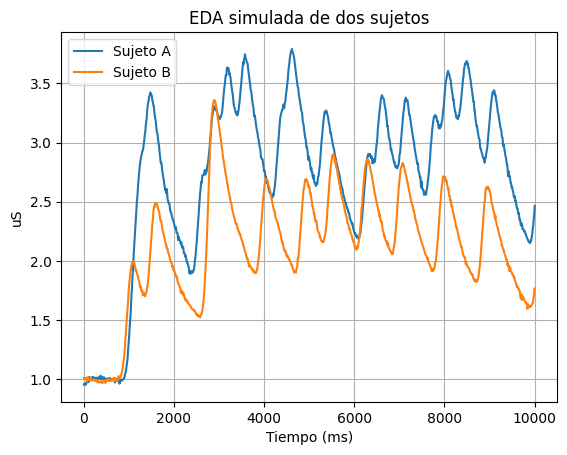

In [ ]:
señal_a = nk.eda_simulate(length=10000, scr_number=19, random_state=3)
señal_b = nk.eda_simulate(length=10000, scr_number=12, random_state=10)

plt.figure()
plt.plot(señal_a,label="Sujeto A")
plt.plot(señal_b,label="Sujeto B")
plt.xlabel("Tiempo (ms)")
plt.ylabel("uS")
plt.title("EDA simulada de dos sujetos")
plt.legend()
plt.grid(True)

plt.show()

Ahora usamos eda_clean para limpiarlas

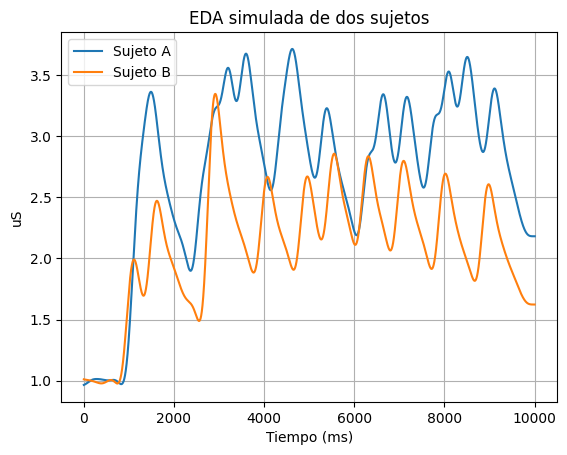

In [ ]:
señal_a = nk.eda_clean(señal_a, sampling_rate=1000, method='neurokit')
señal_b = nk.eda_clean(señal_b, sampling_rate=1000, method='neurokit')

plt.figure()
plt.plot(señal_a,label="Sujeto A")
plt.plot(señal_b,label="Sujeto B")
plt.xlabel("Tiempo (ms)")
plt.ylabel("uS")
plt.title("EDA simulada de dos sujetos")
plt.legend()
plt.grid(True)

plt.show()

Antes de manipularlas es adecuado normalizarlas

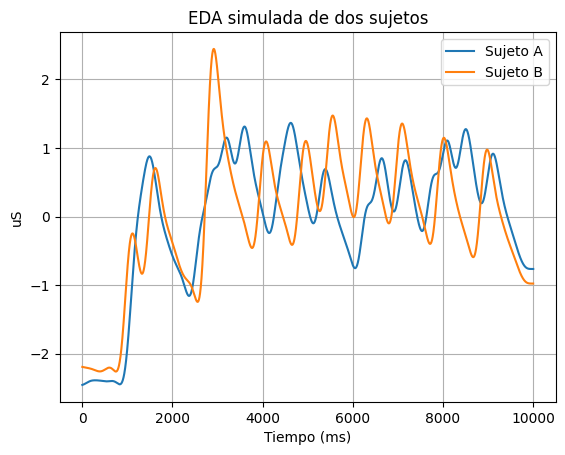

In [ ]:
import scipy.stats as stats

señal_a_z = stats.zscore(señal_a)
señal_b_z = stats.zscore(señal_b)

plt.figure()
plt.plot(señal_a_z,label="Sujeto A")
plt.plot(señal_b_z,label="Sujeto B")
plt.xlabel("Tiempo (ms)")
plt.ylabel("uS")
plt.title("EDA simulada de dos sujetos")
plt.legend()
plt.grid(True)

plt.show()

¿Por qué es necesario pasarlo a puntaje z?¿Qué cambió de la imágen anterior a esta?

In [ ]:
print("Media de activación del sujeto A:")
print(señal_a.mean())

print("Media de activación del sujeto B:")
print(señal_b.mean())

Media de activación del sujeto A:
2.7323685433928326
Media de activación del sujeto B:
2.1155142506461613


Las juntamos en un dataframe (una matriz) y las inspeccionamos por encima

In [ ]:
df = pd.concat([pd.Series(señal_a_z),
                pd.Series(señal_b_z)],
                axis=1)

df.rename({0: "Sujeto_A",
           1: "Sujeto_B"},
           axis=1,
           inplace=True)

print(df)

       Sujeto_A  Sujeto_B
0     -2.458344 -2.195217
1     -2.458143 -2.195339
2     -2.457939 -2.195460
3     -2.457732 -2.195582
4     -2.457522 -2.195705
...         ...       ...
9999  -0.765964 -0.978723
10000 -0.765964 -0.978723
10001 -0.765964 -0.978723
10002 -0.765964       NaN
10003 -0.765964       NaN

[10004 rows x 2 columns]


Como había valores Nan, descartamos estos valores y recién ahí sacamos el promedio

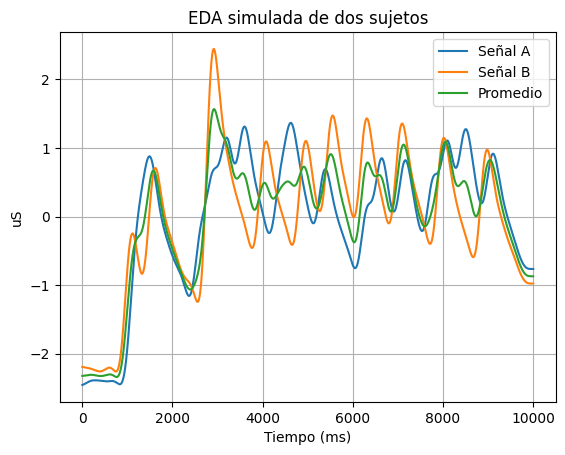

In [ ]:
df.dropna(inplace=True)
señal_promedio = df.mean(axis=1)

plt.figure()
plt.plot(señal_a_z,label="Señal A")
plt.plot(señal_b_z,label="Señal B")
plt.plot(señal_promedio,label="Promedio")
plt.xlabel("Tiempo (ms)")
plt.ylabel("uS")
plt.title("EDA simulada de dos sujetos")
plt.legend()
plt.grid(True)

plt.show()

Por último, graficamos el promedio junto con los errores

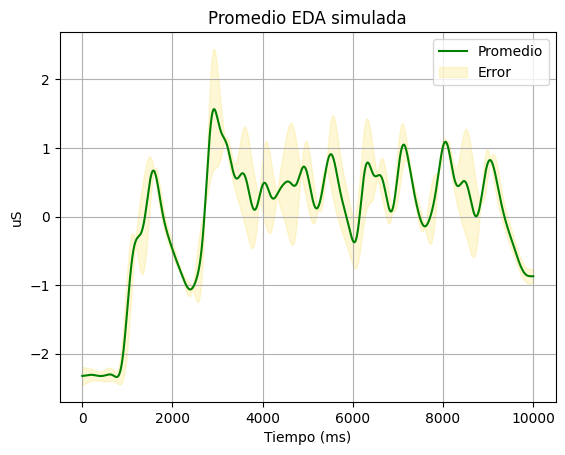

In [ ]:
errores = df.std(axis=1)/np.sqrt(df.shape[1])
rellenos_bajo = señal_promedio-errores
rellenos_alto = señal_promedio+errores

plt.figure()
plt.plot(señal_promedio ,color="Green",label="Promedio")
plt.fill_between(range(len(señal_promedio)),rellenos_bajo,rellenos_alto,alpha = 0.2, color = "#FDD835",label="Error")
plt.xlabel("Tiempo (ms)")
plt.ylabel("uS")
plt.title(f'Promedio EDA simulada')
plt.legend()
plt.grid(True)

plt.show()

Veamos la comparación con las señales solas

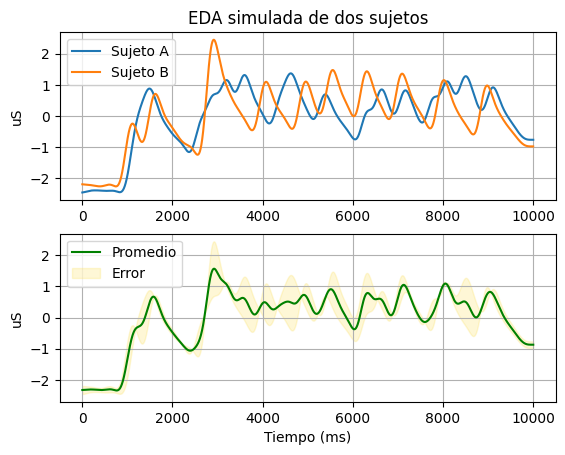

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(señal_a_z,label="Sujeto A")
plt.plot(señal_b_z,label="Sujeto B")
plt.ylabel("uS")
plt.title("EDA simulada de dos sujetos")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(señal_promedio ,color="Green",label="Promedio")
plt.fill_between(range(len(señal_promedio)),rellenos_bajo,rellenos_alto,alpha = 0.2, color = "#FDD835",label="Error")
plt.xlabel("Tiempo (ms)")
plt.ylabel("uS")
plt.legend()
plt.grid(True)

plt.show()